In [1]:
# 데이터 경로
data_path = 'chest_xray/'

# 훈련, 검증, 테스트 데이터 경로 설정
train_path = data_path + 'train/'
valid_path = data_path + 'val/'
test_path = data_path + 'test/'

In [8]:
from glob import glob

print(f'훈련 데이터 개수 확인 : {len(glob(train_path + "*/*"))}')
print(f'검증 데이터 개수 확인 : {len(glob(valid_path + "*/*"))}')
print(f'테스트 데이터 개수 확인 : {len(glob(test_path + "*/*"))}')

훈련 데이터 개수 확인 : 5216개
검증 데이터 개수 확인 : 16개
테스트 데이터 개수 확인 : 624개


In [12]:
# ALL 정상 이미지를 담을 리스트 초기화
all_normal_imgs = []
all_pneumonia_imgs = []

for cat in ['train/', 'val/', 'test/']:
    data_cat_path = data_path + cat
    # 정상, 폐렴 이미지 경로
    normal_imgs = glob(data_cat_path + 'NORMAL/*')
    pneumonia_imgs = glob(data_cat_path + 'PNEUMONIA/*')
    # 정상, 폐렴 이미지 경로 리스트 추가
    all_normal_imgs.extend(normal_imgs)
    all_pneumonia_imgs.extend(pneumonia_imgs)

print(f'Noraml_0 img 주소 : {all_normal_imgs[0]}')
print(f'정상 흉부 이미지 개수 : {len(all_normal_imgs)}')
print(f'폐렴 흉부 이미지 개수 : {len(all_pneumonia_imgs)}')

Noraml_0 img 주소 : chest_xray/train/NORMAL/NORMAL2-IM-0927-0001.jpeg
정상 흉부 이미지 개수 : 1583
폐렴 흉부 이미지 개수 : 4273


### 데이터 시각화

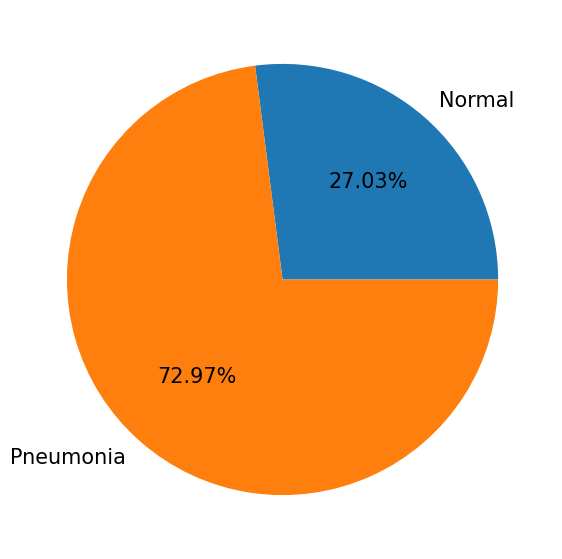

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
plt.figure(figsize=(7, 7))

# 타깃 레이블
label = ['Normal', 'Pneumonia']
# 타깃값 파이 그래프
plt.pie([len(all_normal_imgs), len(all_pneumonia_imgs)], 
        labels=label, 
        autopct='%.2f%%');

### 이미지 출력

In [17]:
import matplotlib.gridspec as gridspec
import cv2

def img_show(img_paths, rows, cols): 
    mpl.rc('font', size=8)
    plt.figure(figsize=(15, 8))
    
    grid = gridspec.GridSpec(rows, cols)
    # 이미지 출력
    for idx, img_path in enumerate(img_paths):
        # cv2 -> 이미지 읽기
        image = cv2.imread(img_path)
        ax = plt.subplot(grid[idx])
        ax.imshow(image)

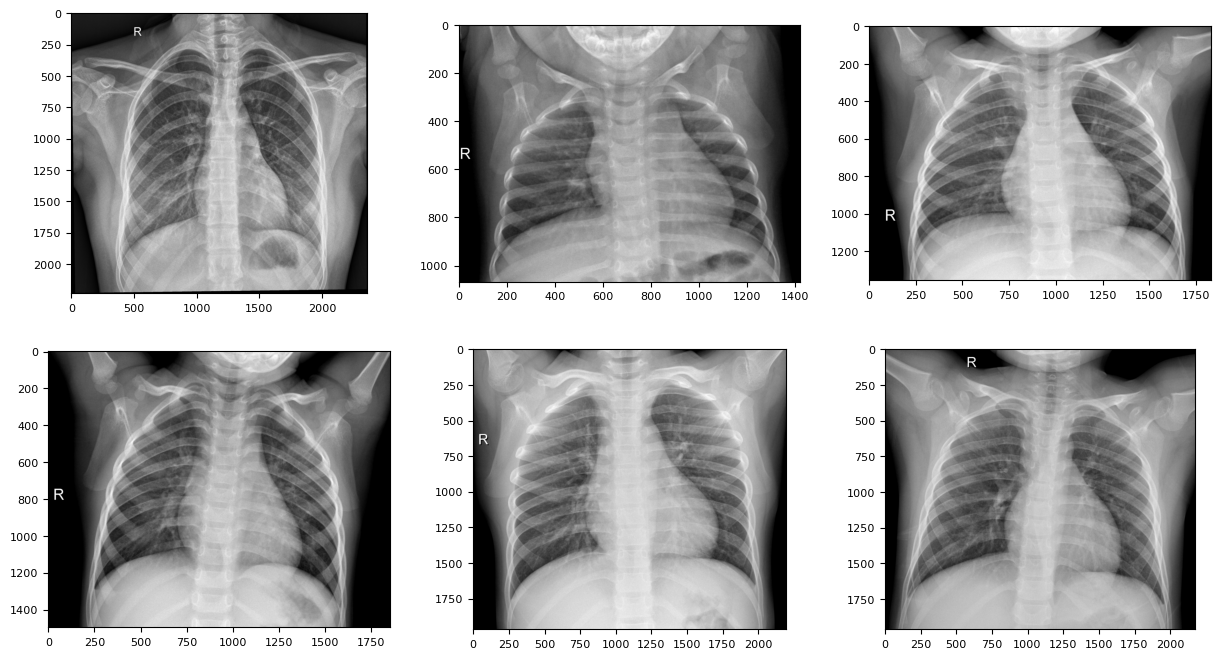

In [23]:
# 정상 엑스선 이미지 경로(6개)
normal_img_paths = all_normal_imgs[:6]
# 이미지 출력
img_show(normal_img_paths,2,3)

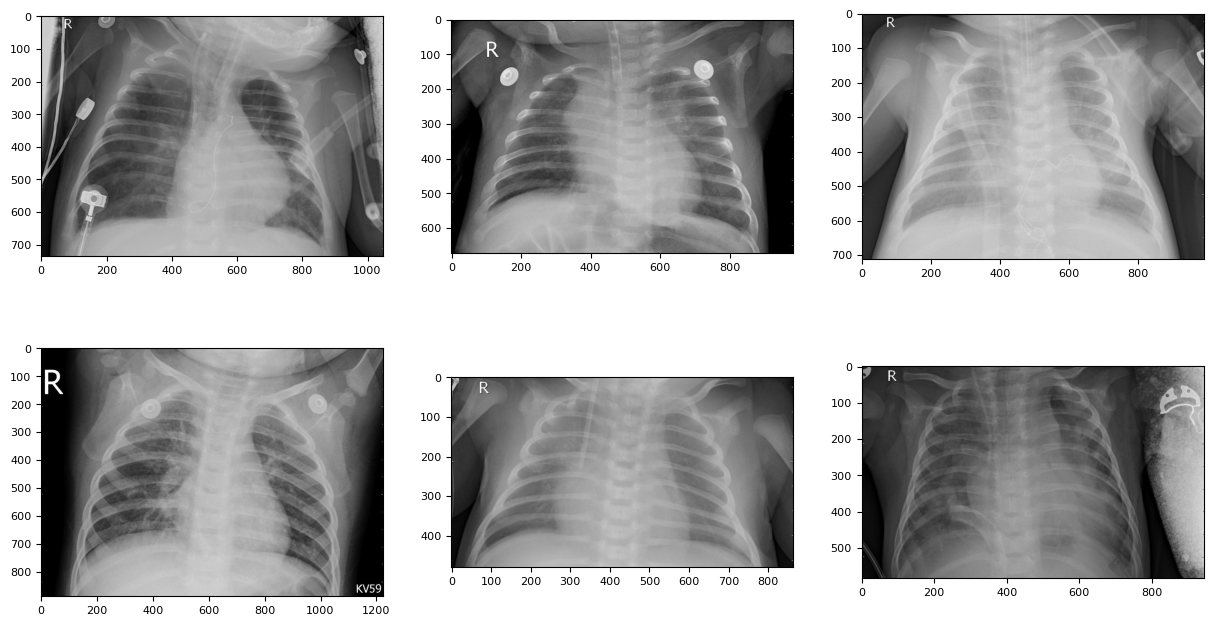

In [24]:
# 폐렴 엑스선 이미지 경로(6개)
pneumonia_img_paths = all_pneumonia_imgs[:6]
# 이미지 출력
img_show(pneumonia_img_paths,2,3)